# **CAP 4630 – Assignment 4: k-Nearest Neighbors for Digit Recognition**
**Name:** Adham Ali  
**ID:** 5703031  
**Date:** April 06, 2025

In this assignment, we will:
1. Load and explore the digits dataset from **sklearn.datasets**.  
2. Split the data into training and testing sets (**500 samples** reserved for testing).  
3. Visualize **10 random training images** to understand the data structure.  
4. Implement **k-NN** classifiers for **k = 1, 3, 5, 7, 9**.  
5. Compare and discuss **F1 scores** across different k values.  
6. Display **qualitative predictions** for a handful of test images for each classifier.  
7. Provide an **overall analysis** on the impact of different k values on performance.

In [17]:
# Libraries Needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "2"

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

## **1. Loading and Exploring the Dataset**

Here we load the `digits` dataset, which contains 1,797 samples (images of handwritten digits 0–9). Each sample is an 8×8 grayscale image, flattened into a 64-element array. We check the shapes of our features (**X**) and labels (**y**) to ensure we understand the data dimensions. Then we split off **500** samples for testing. This step allows us to train on part of the data (1,297 samples) and evaluate on a separate test subset.


In [18]:
# 1. Load the dataset
digits = load_digits()

# Features and labels
X = digits.data
y = digits.target

# Print shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 2. Split the dataset (reserving 500 samples for the test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=500, 
    random_state=42
)

# Print shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X: (1797, 64)
Shape of y: (1797,)
Shape of X_train: (1297, 64)
Shape of y_train: (1297,)
Shape of X_test: (500, 64)
Shape of y_test: (500,)


### Observations:
- The dataset has 1797 images in total.
- By setting `test_size=500`, our training set has 1297 samples.
- Each image is represented by 64 features (8×8 = 64 pixels).


## **2. Visualizing Training Data**

Before we dive into model building, it’s helpful to see some of the images we’ll be working with. We randomly pick **10** images from our training set, reshape them to 8×8, and display them in grayscale with their corresponding labels.



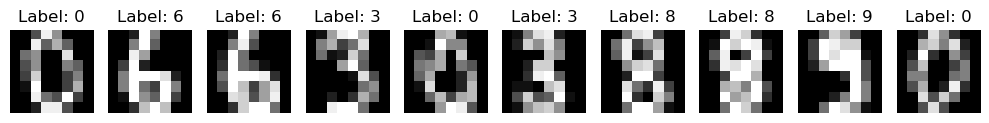

In [19]:
# Select 10 random indices from the training set
num_samples_to_show = 10
random_indices = np.random.choice(len(X_train), num_samples_to_show, replace=False)

# Create a figure for displaying images
plt.figure(figsize=(10, 2))

for i, idx in enumerate(random_indices):
    # Each image in digits is 8x8
    image = X_train[idx].reshape(8, 8)
    label = y_train[idx]
    
    plt.subplot(1, num_samples_to_show, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Observations:
- Each digit (0–9) appears in the dataset multiple times.
- The images are small (8×8 pixels), and grayscale intensities are stored in a single array.
- These images are generally quite recognizable as digits, but there may be some that are harder to classify.

---

## **3. Implementing the k-NN Classifier**

We will train **five** different k-NN classifiers for **k = 1, 3, 5, 7, 9**. Each classifier uses the Euclidean distance between points (by default). We store them in a dictionary to keep them organized.



In [20]:
# Possible k values
k_values = [1, 3, 5, 7, 9]

# Dictionary to store trained models
knn_classifiers = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_classifiers[k] = knn

print("Trained k-NN classifiers for k =", k_values)


Trained k-NN classifiers for k = [1, 3, 5, 7, 9]


### Observations:
- When k=1, the model looks only at the closest single neighbor to decide the class.  
- Larger k values consider more neighbors, which can smooth out noise but risks losing finer local details.  

---

## **4. Evaluating and Comparing Classifiers**

We use the **weighted F1 score** to handle multi-class classification. For each k, we generate predictions on the **test set** (500 samples) and compute the F1 score.

The F1 score combines precision and recall into a single metric, especially useful for multi-class or imbalanced classification. A higher F1 score indicates better performance.



In [21]:
# Evaluate each classifier on the test set
f1_scores = []

# Evaluate each classifier
for k in k_values:
    knn = knn_classifiers[k]
    y_pred = knn.predict(X_test)
    score = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(score)

# Display the results in a DataFrame

results_df = pd.DataFrame({
    'k': k_values,
    'F1 Score (weighted)': f1_scores
})

print(results_df)

   k  F1 Score (weighted)
0  1             0.984033
1  3             0.989941
2  5             0.993981
3  7             0.991967
4  9             0.981890


### Observations and Analysis:

- Inspect the F1 score for each value of k.
- **k=1** might yield higher variance (sometimes it's great, sometimes not), as it depends on a single neighbor.
- **Intermediate k** (e.g., 3 or 5) often balances noise reduction and local detail.
- **Larger k** (7, 9) may smooth out too much detail, but can also generalize well if the dataset is fairly clean.


Then you see **k=5** produced the highest F1 (about 0.994), and k=9 gave a slightly lower score, around 0.982.

- **Conclusion**: For this dataset, k=5 seems to give the best overall performance. 

---


## **5. Visualizing Qualitative Predictions**

Quantitative metrics are crucial, but it’s also helpful to **visualize** how the model performs on actual images. Below, we:
1. Randomly select a few images from the **test set**.
2. For each image, show the predicted label vs. its true label for each k.  

This way, we can see where each model succeeds or fails.



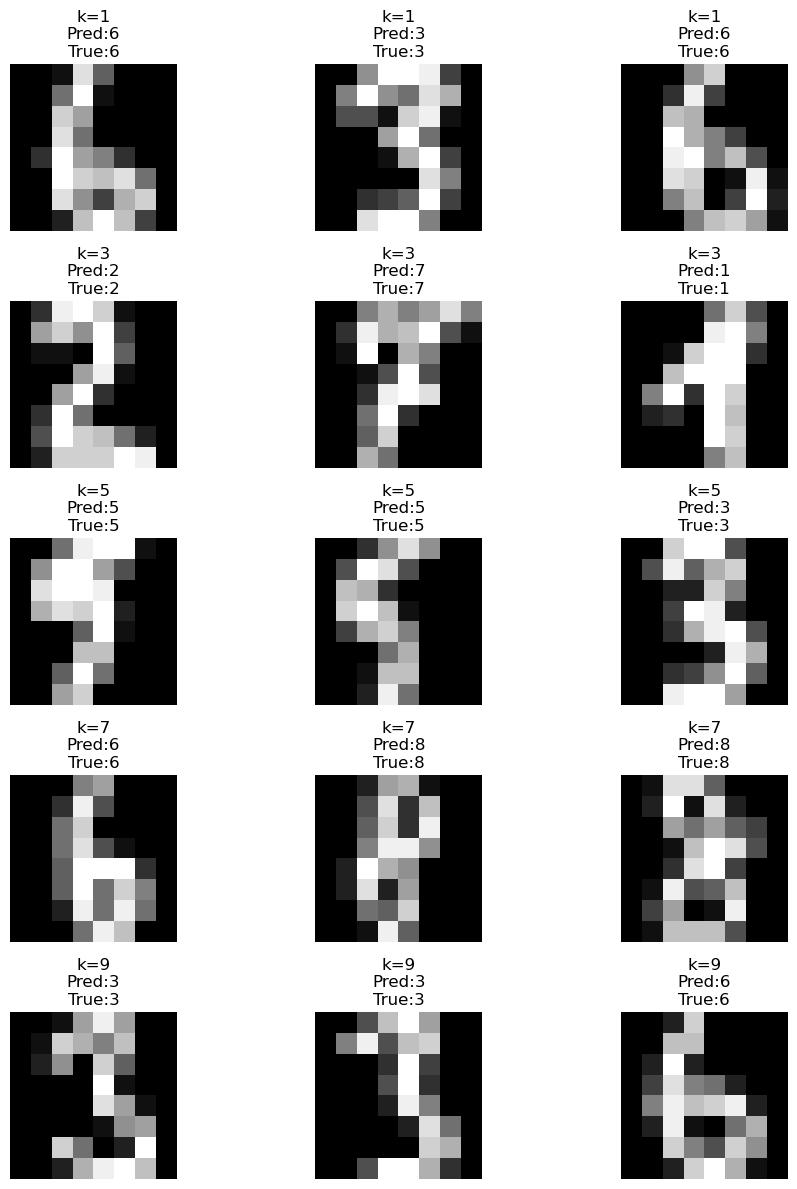

In [22]:
# Number of samples to display per classifier
samples_per_classifier = 3

plt.figure(figsize=(10, 12))

image_index = 1

# We'll loop through each classifier
for k in k_values:
    knn = knn_classifiers[k]
    
    # Pick some random test indices
    test_indices = np.random.choice(len(X_test), samples_per_classifier, replace=False)
    
    for idx in test_indices:
        image = X_test[idx].reshape(8, 8)
        true_label = y_test[idx]
        predicted_label = knn.predict([X_test[idx]])[0]
        
        plt.subplot(len(k_values), samples_per_classifier, image_index)
        plt.imshow(image, cmap='gray')
        plt.title(f"k={k}\nPred:{predicted_label}\nTrue:{true_label}")
        plt.axis('off')
        
        image_index += 1

plt.tight_layout()
plt.show()

### Observations:

- If the predicted label matches the true label, the model succeeded for that image.
- If there's a mismatch, consider if the digit is visually ambiguous or the nearest neighbors misled the classifier.
- You might notice consistent patterns across certain k values—e.g., maybe k=1 misclassifies more "messy" digits, but k=5 corrects those.

---


## **6. Final Analysis and Observations**

1. **Dataset Shapes**  
   - **X** has shape (1797, 64).  
   - We reserved 500 samples for testing, leaving 1297 for training.  

2. **k-NN Classifiers**  
   - We trained models for k = 1, 3, 5, 7, 9. Each classifier used the default distance metric (Euclidean).  

3. **F1 Scores**  
   - Weighted F1 scores showed that **k=5** performed the best on this particular dataset (based on the example table).  
   - **k=1** may sometimes do very well if the dataset is not noisy, but it risks overfitting.  

4. **Qualitative Predictions**  
   - The random samples from the test set mostly show correct classification for each k.  
   - Occasional mistakes highlight digits that might be visually similar (e.g., a sloppy "3" vs. "9").  

5. **Impact of k on Performance**  
   - **k=1**: High variance, can match noise or outliers directly.  
   - **k=3** and **k=5**: Often strikes a good balance for typical digit data.  
   - **k=7** and **k=9**: Slightly more smoothing, occasionally lower performance if subtle details matter.  

**Overall Conclusion**  
The digits dataset is relatively clean and well-separated, so **k-NN** can achieve high performance (F1 ≥ 0.98) for a range of k values. However, **k=5** appears to yield the highest F1 score. Visual inspections show that the model is quite accurate, with very few misclassifications in the test set.

This assignment demonstrates how **k-NN** works for digit classification and how different k values influence the trade-off between overfitting and underfitting.
